<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/GalrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

#package I will use for constants and units conversion 
import astropy


Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

From 
\begin{equation}
F = M a \\
\end{equation}
and 
\begin{equation}
F = G \frac{Mm(r)}{r^2} \\
a = \frac{v^2}{r}
\end{equation}

We have
\begin{equation}
M \frac{v^2}{r} = G \frac{M m(r)}{r^2}
\end{equation}

Finally,
\begin{equation}
v^2 = G\frac{m(r)}{r}
\end{equation}

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [31]:
# your code here
m31 = pd.read_csv('m31.csv', comment="#", names=['r', 'v', 'dv', 'derr'])
m31.head()

,r,v,dv,derr
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [32]:
m31.describe()

,r,v,dv,derr
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [33]:
apparentSizeM31 = 3.167 #deg
distanceM31 = 778 #kpc 


In [34]:
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))


Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [35]:
# your code here
distanceM31_std = 33 # kpc


Print the distance like I printed the angular size. 

In [46]:
# your code here
print("The distance of Andromeda : {:.2f}+/-{:.2f} kpc".format(distanceM31, distanceM31_std))

The distance of Andromeda : 778.00+/-33.00 kpc


To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 

In [44]:
def physical_size(dist, alpha, dist_std=0, alpha_std=0):
    # calculate the physical size of a galaxy from distance and apparent size
    y = dist * alpha
    y_err = dist * alpha * np.sqrt( (dist_std / dist)**2 + (alpha_std / alpha)**2)
    return y, y_err

In [87]:
alpha_m31 = m31angS.to(u.rad).value

size_M31, size_M31_std = physical_size(distanceM31, alpha_m31, dist_std=distanceM31_std)

print("The physical size of Andromeda : {:.2f}+/-{:.2f} kpc".format(size_M31, size_M31_std))



The physical size of Andromeda : 43.00+/-1.82 kpc


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [134]:
def getradii(gal, gsize, n):
    # get the min of  radius
    gal_n = gal[gal.r > n * gsize].iloc[0]
    
    return gal_n

In [135]:
gal_1 = getradii(m31, size_M31, 1)
gal_1

r        49.222
v       237.069
dv      109.381
derr     23.924
Name: 34, dtype: float64

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

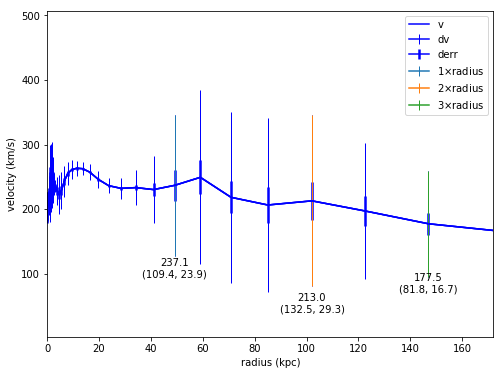

In [310]:
def plotGal(gal, rds, N):
    # plot the rotational curve
    pl.figure(figsize=(8, 6))
    pl.plot(gal.r, gal.v, label='v', color='b')
    pl.errorbar(gal.r, gal.v, gal.dv, color='b', label='dv', elinewidth=1)
    pl.errorbar(gal.r, gal.v, gal.derr, color='b', label='derr', elinewidth=2.5)
    
    for n in N:
        galn = getradii(gal, rds, n)
        r, v, dv, derr = galn.r, galn.v, galn.dv, galn.derr
        pl.errorbar(r, v, dv, label='%i$\\times$radius'%n, elinewidth=1)
        pl.text(s='%.1f\n(%.1f, %.1f)'%(v, dv, derr), 
                x=r, y=(v-1.3*dv), horizontalalignment='center')
    
    pl.xlim([0, (n+1)*rds])
    pl.xlabel('radius (kpc)')
    pl.ylabel('velocity (km/s)')
    pl.legend()

plotGal(m31, rds=size_M31, N=[1,2,3])

##### Figure 1. The rotational curve of galaxy M31.

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 3-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $3-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

The expected ratio 
\begin{equation}
\frac{v^2_N}{v^2_1} = \frac{r_1}{r_N} = \frac{1}{N}
\end{equation}

In [ ]:
+ (2 * gal_1[err] / gal_1.v)**2

In [332]:
#delete
def vratios(gal, rds, N=[1, 2, 3], err='dv'):
    # calculate ratio of velocities
    gal_1 = getradii(gal, rds, 1)
    expected = []
    calculated = []
    calculated_std = []
    for n in N:
        expected.append(1/n)
        galn = getradii(gal, rds, n)
        calculated.append(galn.v**2 / gal_1.v**2)
        calculated_std.append(galn.v**2 / gal_1.v**2 * np.sqrt((2 * galn[err] /galn.v)**2 + (2 * gal_1[err] / gal_1.v)**2))
    
    df = pd.DataFrame({'N':N, 'expected':expected, 'calculated':calculated, 'calculated_std':calculated_std})  
    df['upper limit'] = df.calculated + 2*df.calculated_std
    df['lower limit'] = df.calculated - 2*df.calculated_std
    df['check'] = (df.expected<=df['upper limit']) & (df.expected>=df['lower limit'])
    plot_vratios(df)
    # your code here
    return df

def plot_vratios(df):
    # plot vratios vs. n
    pl.figure(figsize=(7,5))
    pl.plot(df.N, df.expected, 'x-',label='expected')
    pl.errorbar(df.N, df.calculated, 2*df.calculated_std, label='calculated')
    pl.legend()
    pl.xlabel('N')
    pl.ylabel('ratio of velocity')

,N,expected,calculated,calculated_std,upper limit,lower limit,check
0,1,1.000000,1.000000,1.305005,3.610010,-1.610010,True
1,2,0.500000,0.807268,1.250178,3.307624,-1.693088,True
2,3,0.333333,0.560725,0.731105,2.022935,-0.901485,True
3,4,0.250000,0.486326,0.627925,1.742177,-0.769525,True
4,5,0.200000,0.459994,0.613439,1.686872,-0.766883,True
5,6,0.166667,0.406248,0.549795,1.505837,-0.693342,True
6,7,0.142857,0.406248,0.549795,1.505837,-0.693342,True
7,8,0.125000,0.264719,0.484817,1.234352,-0.704914,True
8,9,0.111111,0.504004,0.885104,2.274212,-1.266203,True
9,10,0.100000,0.504004,0.885104,2.274212,-1.266203,True


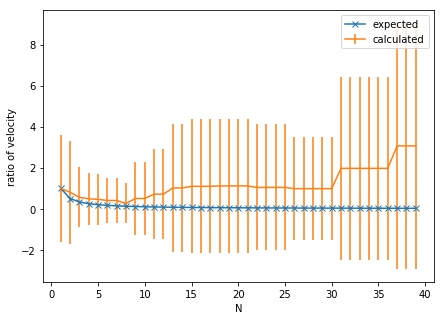

In [342]:
# use error dv
N = np.arange(1, 40)
df_dv = vratios(m31, size_M31, N, err='dv')
df_dv

,N,expected,calculated,calculated_std,upper limit,lower limit,check
0,1,1.000000,1.000000,0.285433,1.570866,0.429134,True
1,2,0.500000,0.807268,0.275576,1.358420,0.256116,True
2,3,0.333333,0.560725,0.154555,0.869835,0.251615,True
3,4,0.250000,0.486326,0.134807,0.755939,0.216713,True
4,5,0.200000,0.459994,0.159747,0.779489,0.140499,True
5,6,0.166667,0.406248,0.170867,0.747983,0.064513,True
6,7,0.142857,0.406248,0.170867,0.747983,0.064513,True
7,8,0.125000,0.264719,0.195941,0.656601,-0.127163,True
8,9,0.111111,0.504004,0.324685,1.153374,-0.145366,True
9,10,0.100000,0.504004,0.324685,1.153374,-0.145366,True


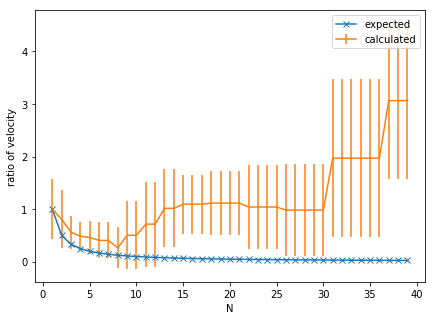

In [343]:
# use error derr
df_derr = vratios(m31, size_M31, N, err='derr')
df_derr

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [335]:
size_MW = 46  # in kpc
size_MW_std = 10

In [336]:
mw = pd.read_csv('mw.csv', comment='#', names=['r', 'v', 'dv', 'derr'])
mw.head()

,r,v,dv,derr
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


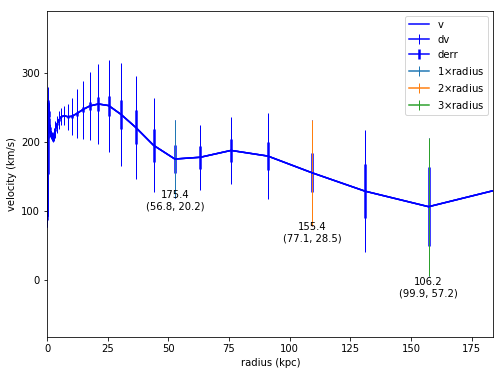

In [338]:
plotGal(mw, size_MW, N=[1,2,3])

,N,expected,calculated,calculated_std,upper limit,lower limit,check
0,1,1.000000,1.000000,0.916070,2.832139,-0.832139,True
1,2,0.500000,0.785271,0.930592,2.646455,-1.075914,True
2,3,0.333333,0.366608,0.729553,1.825714,-1.092498,True
3,4,0.250000,0.580405,1.482526,3.545457,-2.384646,True
4,5,0.200000,0.281339,0.950151,2.181641,-1.618963,True
5,6,0.166667,0.281339,0.950151,2.181641,-1.618963,True
6,7,0.142857,0.281339,0.950151,2.181641,-1.618963,True
7,8,0.125000,0.281339,0.950151,2.181641,-1.618963,True
8,9,0.111111,0.281339,0.950151,2.181641,-1.618963,True
9,10,0.100000,0.281339,0.950151,2.181641,-1.618963,True


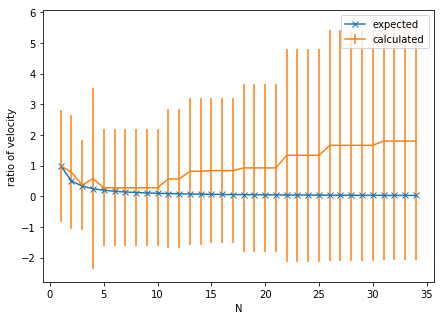

In [346]:
vratios(mw, size_MW, N, err='dv')

,N,expected,calculated,calculated_std,upper limit,lower limit,check
0,1,1.000000,1.000000,0.325146,1.650293,0.349707,True
1,2,0.500000,0.785271,0.340008,1.465288,0.105254,True
2,3,0.333333,0.366608,0.403639,1.173885,-0.440669,True
3,4,0.250000,0.580405,0.946525,2.473454,-1.312644,True
4,5,0.200000,0.281339,0.585877,1.453094,-0.890416,True
5,6,0.166667,0.281339,0.585877,1.453094,-0.890416,True
6,7,0.142857,0.281339,0.585877,1.453094,-0.890416,True
7,8,0.125000,0.281339,0.585877,1.453094,-0.890416,True
8,9,0.111111,0.281339,0.585877,1.453094,-0.890416,True
9,10,0.100000,0.281339,0.585877,1.453094,-0.890416,True


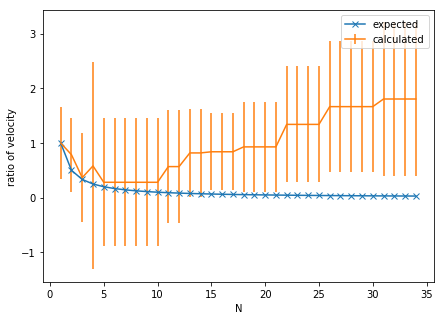

In [345]:
N = np.arange(1, 35)
vratios(mw, size_MW, N, err='derr')